In [35]:
import numpy as np
import pandas as pd
import os
print(os.listdir)

<built-in function listdir>


In [36]:
dataset_path = "train_math.csv"
dataset=pd.read_csv(dataset_path)
dataset.pop('DBN')
dataset.pop('Year')
#####
Dataset_path = "test_math.csv"
Dataset=pd.read_csv(Dataset_path)
Dataset.pop('DBN')
Dataset.pop('Year')


0       2011
1       2011
2       2011
3       2011
4       2011
5       2011
6       2011
7       2011
8       2011
9       2011
10      2011
11      2011
12      2011
13      2011
14      2011
15      2011
16      2011
17      2011
18      2011
19      2011
20      2011
21      2011
22      2011
23      2011
24      2011
25      2011
26      2011
27      2011
28      2011
29      2011
        ... 
3727    2011
3728    2011
3729    2011
3730    2011
3731    2011
3732    2011
3733    2011
3734    2011
3735    2011
3736    2011
3737    2011
3738    2011
3739    2011
3740    2011
3741    2011
3742    2011
3743    2011
3744    2011
3745    2011
3746    2011
3747    2011
3748    2011
3749    2011
3750    2011
3751    2011
3752    2011
3753    2011
3754    2011
3755    2011
3756    2011
Name: Year, dtype: int64

In [37]:
x_train=dataset.loc[:,dataset.columns !='Mean Scale Score']

y_train=dataset.loc[:,'Mean Scale Score']
y_train=y_train.astype(float)

print x_train.shape
print y_train.shape

#####

x_test=Dataset.loc[:,Dataset.columns !='Mean Scale Score']

y_test=Dataset.loc[:,'Mean Scale Score']
y_test=y_test.astype(float)

print x_test.shape
print y_test.shape


(17849, 12)
(17849,)
(3757, 12)
(3757,)


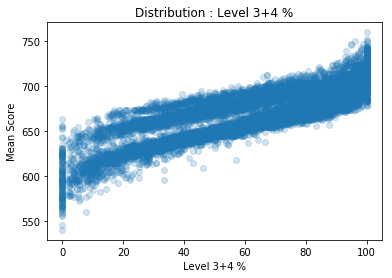

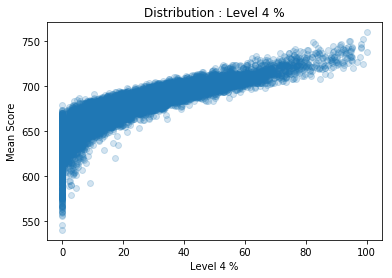

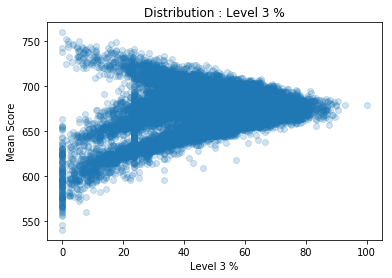

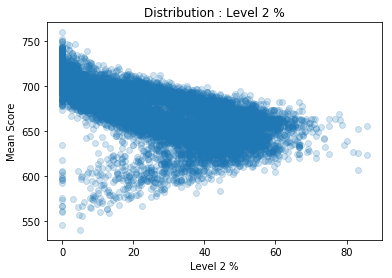

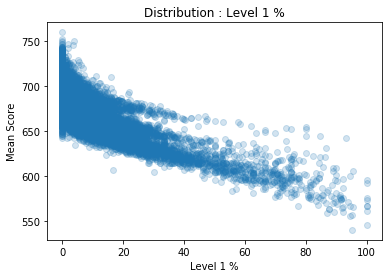

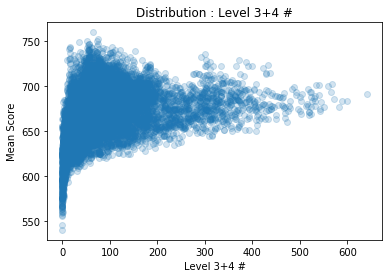

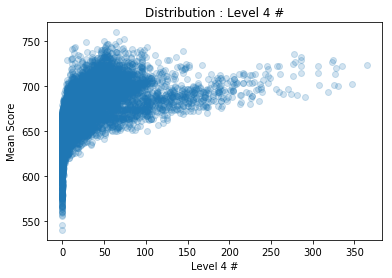

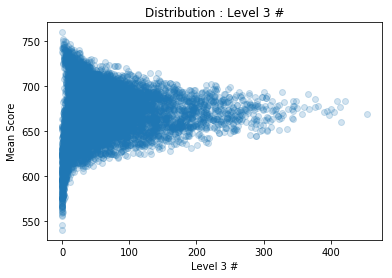

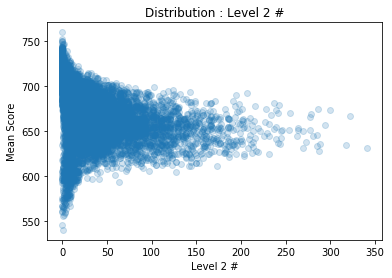

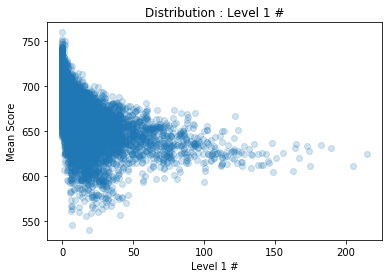

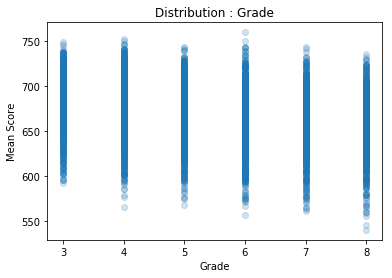

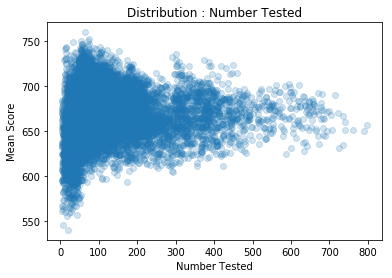

In [38]:
#Check Distribution
import matplotlib.pyplot as plt
plt.scatter(x_train.loc[:,'Level 3+4 %'].values,y_train, alpha=0.2)
plt.xlabel('Level 3+4 %')
plt.ylabel('Mean Score')
plt.title('Distribution : Level 3+4 %')
plt.show()

plt.scatter(x_train.loc[:,'Level 4 %'].values,y_train, alpha=0.2)
plt.xlabel('Level 4 %')
plt.ylabel('Mean Score')
plt.title('Distribution : Level 4 %')
plt.show()

plt.scatter(x_train.loc[:,'Level 3 %'].values,y_train, alpha=0.2)
plt.xlabel('Level 3 %')
plt.ylabel('Mean Score')
plt.title('Distribution : Level 3 %')
plt.show()

plt.scatter(x_train.loc[:,'Level 2 %'].values,y_train, alpha=0.2)
plt.xlabel('Level 2 %')
plt.ylabel('Mean Score')
plt.title('Distribution : Level 2 %')
plt.show()

plt.scatter(x_train.loc[:,'Level 1 %'].values,y_train, alpha=0.2)
plt.xlabel('Level 1 %')
plt.ylabel('Mean Score')
plt.title('Distribution : Level 1 %')
plt.show()

plt.scatter(x_train.loc[:,'Level 3+4 #'].values,y_train, alpha=0.2)
plt.xlabel('Level 3+4 #')
plt.ylabel('Mean Score')
plt.title('Distribution : Level 3+4 #')
plt.show()

plt.scatter(x_train.loc[:,'Level 4 #'].values,y_train, alpha=0.2)
plt.xlabel('Level 4 #')
plt.ylabel('Mean Score')
plt.title('Distribution : Level 4 #')
plt.show()

plt.scatter(x_train.loc[:,'Level 3 #'].values,y_train, alpha=0.2)
plt.xlabel('Level 3 #')
plt.ylabel('Mean Score')
plt.title('Distribution : Level 3 #')
plt.show()

plt.scatter(x_train.loc[:,'Level 2 #'].values,y_train, alpha=0.2)
plt.xlabel('Level 2 #')
plt.ylabel('Mean Score')
plt.title('Distribution : Level 2 #')
plt.show()

plt.scatter(x_train.loc[:,'Level 1 #'].values,y_train, alpha=0.2)
plt.xlabel('Level 1 #')
plt.ylabel('Mean Score')
plt.title('Distribution : Level 1 #')
plt.show()

plt.scatter(x_train.loc[:,'Grade'].values,y_train, alpha=0.2)
plt.xlabel('Grade')
plt.ylabel('Mean Score')
plt.title('Distribution : Grade')
plt.show()

plt.scatter(x_train.loc[:,'Number Tested'].values,y_train, alpha=0.2)
plt.xlabel('Number Tested')
plt.ylabel('Mean Score')
plt.title('Distribution : Number Tested')
plt.show()


In [39]:

x_train=x_train.iloc[:,3:12:2]
print x_train.shape

x_train=x_train.values
y_train=y_train.values

#####
x_test=x_test.iloc[:,3:12:2]
                 
print x_test.shape

x_test=x_test.values
y_test=y_test.values


(17849, 5)
(3757, 5)


In [40]:
#Normalization
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

#####

x_test -= mean  #use the mean,std of the train data
x_test /= std

In [41]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten

def build_model(): 
    model = Sequential()
    model.add(Dense(64, activation='relu',input_dim=5))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='softmax'))
    model.add(Dense(1))
    optimizer=Adam(lr=0.8,beta_1=0.6, beta_2=0.5)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

#mse:mean squared error, mae=mean absolute error

In [42]:
k = 4

num_val_samples = len(x_train) // k
num_epochs = 300
val_mae_histories = []
mae_histories=[]
all_scores=[]
for i in range(k):
    print('working on #', i)
    val_x = x_train[i * num_val_samples: (i + 1) * num_val_samples] 
    val_y = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_x_train = np.concatenate(  \
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_y_train = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()  
    history = model.fit(partial_x_train, partial_y_train,
                    validation_data=(val_x, val_y),
                    epochs=num_epochs, batch_size=100, verbose=0)
    val_mae_history = history.history['val_mean_absolute_error']
    val_mae_histories.append(val_mae_history) 
    
    mae_history=history.history['mean_absolute_error']
    mae_histories.append(mae_history)
    
    val_mse, val_mae = model.evaluate(val_x, val_y)
    all_scores.append(val_mae)

('working on #', 0)
4462/4462 [==============================] - 0s 36us/step
('working on #', 1)
4462/4462 [==============================] - 0s 47us/step
('working on #', 2)
4462/4462 [==============================] - 0s 47us/step
('working on #', 3)
4462/4462 [==============================] - 0s 48us/step


In [43]:
print all_scores
print np.mean(all_scores)

[18.70057088150031, 17.502495903329752, 20.295424820007845, 23.485918630670934]
19.99610255887721


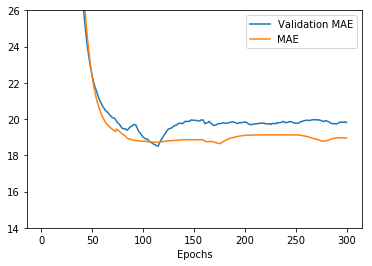

In [51]:
average_val_mae_history = [
    np.mean([x[i] for x in val_mae_histories]) for i in range(num_epochs)]
average_mae_history= [np.mean([x[i] for x in mae_histories]) for i in range(num_epochs)]

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_mae_history = smooth_curve(average_val_mae_history[:])
smooth_mae_history=smooth_curve(average_mae_history[:])

plt.plot(range(1, len(smooth_val_mae_history) + 1), smooth_val_mae_history )
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history )
plt.xlabel('Epochs')
plt.legend(['Validation MAE','MAE'])
plt.ylim(14,26)
plt.show()

In [45]:
model=build_model()
model.fit(x_train, y_train, 
          epochs=100, batch_size=100, verbose=0)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

3757/3757 [==============================] - 1s 138us/step


In [46]:
print test_mae_score

15.7761026087485


Text(0,0.5,'Count')

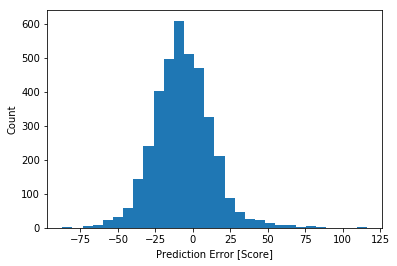

In [49]:
predictions=model.predict(x_test).flatten()
error = predictions - y_test
plt.hist(error, bins = 30)
plt.xlabel("Prediction Error [Score]")
plt.ylabel("Count")


In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 64)                384       
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 50)                1650      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 51        
Total params: 4,165
Trainable params: 4,165
Non-trainable params: 0
_________________________________________________________________
